<a href="https://colab.research.google.com/github/zkiokko/AI/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from matplotlib import cm, pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score
import time



def load_dataset(partition):
    X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
    y = y.astype(int)[:int(len(X)*partition//1)]
    X = X/255
    X=X[:int(len(X)*partition//1)]
    return X,y

def tune_parameter(parname, parvalues ,cf ,k_fold,X,y):
    acc=[]
    for i in range(len(parvalues)):
        cf.set_params(**{parname:parvalues[i]})
        acc.append(cross_val_score(cf, X, y, cv=k_fold,scoring="accuracy"))
    return acc


In [3]:


X,y=load_dataset(.66)


In [4]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=56)

In [5]:
from numpy import arange

cl=RandomForestClassifier(n_estimators=100)
t_values=[.0005,.00025,.0001,.00005,.00001]
print(t_values)
start = time.time()
t_acc=tune_parameter("min_impurity_decrease",t_values,cl,10,X_train,y_train)
end = time.time()
print("10-way cross validation mean time "+str(int((end - start)/len(t_values)))+"s")

[0.0005, 0.00025, 0.0001, 5e-05, 1e-05]
10-way cross validation mean time 212s


In [6]:
from numpy import mean


print(mean(t_acc,axis=1))
t_accp=mean(t_acc,axis=1)

[0.93127706 0.94396645 0.95787338 0.96225649 0.96463745]


''

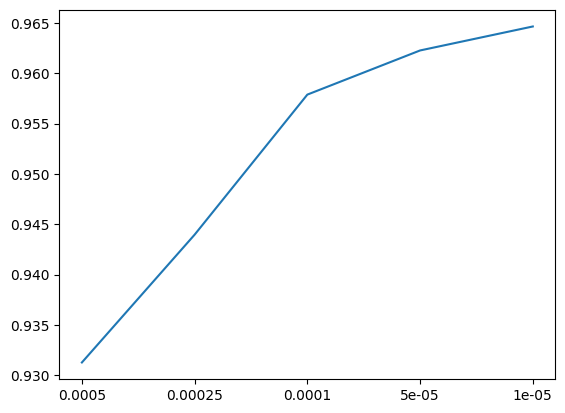

In [7]:

fig, ax = plt.subplots()
x_place=arange(len(t_accp))
ax.plot(t_accp)

plt.xticks(x_place, t_values)
;


In [8]:
start = time.time()
cl=RandomForestClassifier(n_estimators=100,min_impurity_decrease=0.00005)
cl.fit(X_train,y_train)
end = time.time()
print("training time "+str(int(end - start))+"s")

clBase=RandomForestClassifier(n_estimators=100)
clBase.fit(X_train,y_train)


training time 26s


RandomForestClassifier()

In [9]:
from sklearn.metrics import accuracy_score
print("Base accuracy "+str(accuracy_score(y_test,clBase.predict(X_test))))
start=time.time()
print("early stop accuracy "+str(accuracy_score(y_test,cl.predict(X_test))))
end = time.time()
print("Test time "+str(int(end - start))+"s")

Base accuracy 0.9619047619047619
early stop accuracy 0.9590909090909091
Test time 0s


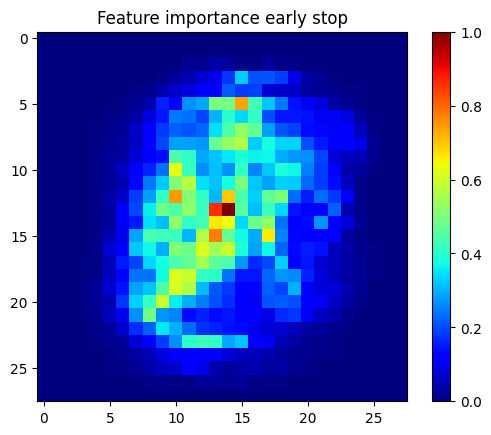

In [10]:

fi=cl.feature_importances_
data=(fi/max(fi)).reshape(28,28)
fig, ax = plt.subplots()
l=ax.imshow(data, cmap=cm.jet, interpolation='nearest')
ax.set_title("Feature importance early stop")
fig.colorbar(l,ax=ax)


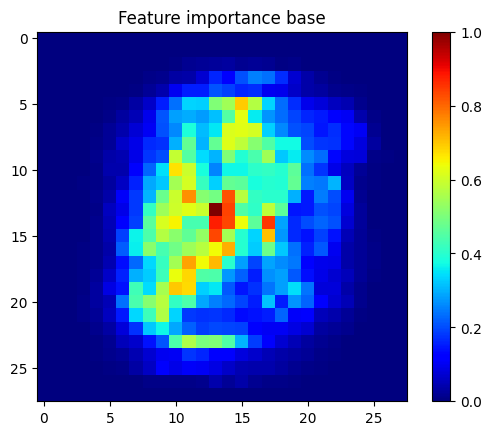

In [11]:
fi=clBase.feature_importances_
data=(fi/max(fi)).reshape(28,28)
fig, ax = plt.subplots()
l=ax.imshow(data, cmap=cm.jet, interpolation='nearest')
ax.set_title("Feature importance base")
fig.colorbar(l,ax=ax)

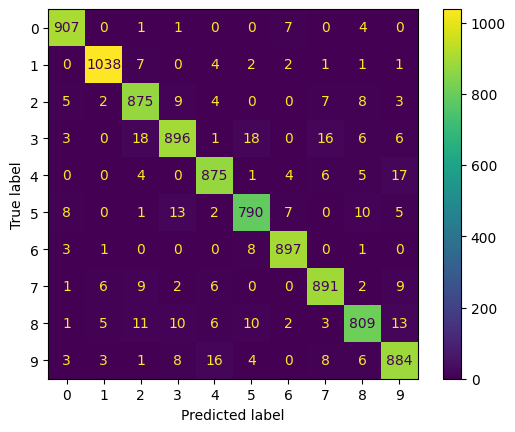

In [12]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, cl.predict(X_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = arange(10))

cm_display.plot()
plt.show()